In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow_hub
import os


import nltk 
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report


import re
import gensim
import seaborn
import random

In [ ]:
!pip install bert-for-tf2
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

     |████████████████████████████████| 51kB 5.7MB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-cp37-none-any.whl size=30535 sha256=1c0e60f3e34f211a145a8542d53bb703c1a21531455ef9f71c759db9b3a7b335
  Stored in directory: /root/.cache/pip/wheels/a1/04/ee/347bd9f5b821b637c76411d280271a857aece00358896a230f
  Created wheel for py-params: filename=py_params-0.10.2-cp37-none-any.whl size=7912 sha256=fec3878581d7f85a19883a585d5da75caaf2c11bd1dbf266a2437096a3aa862a
  Stored in directory: /root/.cache/pip/wheels/d0/4a/70/ff12450229ff1955abf01f365051d4faae1c20aef53ab4cf09
  Created wheel for params-flow: filename=params_flow-0.8.2-cp37-none-any.whl size=19472 sha256=438964b8195d6aa145603b5d23094722326b5a7e84c0bdba18a04e90dd56179a
  Stored in directory: /root/.cache/pip/wheels/08/c8/7f/81c86b9ff2b86e2c477e3914175be03e679e596067dc630c06
Successfully built bert-for-tf2 py-params params-flow


In [ ]:
import bert

In [ ]:
from bert.tokenization.bert_tokenization import FullTokenizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def seeding(seed):
    random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

In [ ]:
seeding(15)

In [ ]:
module_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/1"
bert_layer = tensorflow_hub.KerasLayer(module_url, trainable=True)

In [ ]:
#EMBEDDINGLENGTH=300

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
# df_train = pd.read_csv("task_humanitarian_text_img_agreed_lab_train.tsv", sep='\t')
# df_val = pd.read_csv("task_humanitarian_text_img_agreed_lab_dev.tsv", sep='\t')
# df_test = pd.read_csv("task_humanitarian_text_img_agreed_lab_test.tsv", sep='\t')

In [ ]:
df_train = pd.read_csv("task_humanitarian_text_img_agreed_lab_train.tsv", sep='\t')
df_val = pd.read_csv("task_humanitarian_text_img_agreed_lab_dev.tsv", sep='\t')
df_test = pd.read_csv("task_humanitarian_text_img_agreed_lab_test.tsv", sep='\t')

In [ ]:
#Dropping duplicates
df_train = df_train.drop_duplicates(subset="tweet_id")
df_val = df_val.drop_duplicates(subset="tweet_id")
df_test = df_test.drop_duplicates(subset="tweet_id")

In [ ]:
#DATA VISUALISATION

In [ ]:
# df1 = pd.read_csv("CrisisMMD_v2.0/annotations/california_wildfires_final_data.tsv", sep='\t')
# df2 = pd.read_csv("CrisisMMD_v2.0/annotations/hurricane_harvey_final_data.tsv", sep='\t')
# df3 = pd.read_csv("CrisisMMD_v2.0/annotations/hurricane_irma_final_data.tsv", sep='\t')
# df4 = pd.read_csv("CrisisMMD_v2.0/annotations/hurricane_maria_final_data.tsv", sep='\t')
# df5 = pd.read_csv("CrisisMMD_v2.0/annotations/iraq_iran_earthquake_final_data.tsv", sep='\t')
# df6 = pd.read_csv("CrisisMMD_v2.0/annotations/mexico_earthquake_final_data.tsv", sep='\t')
# df7 = pd.read_csv("CrisisMMD_v2.0/annotations/srilanka_floods_final_data.tsv", sep='\t')

In [ ]:
def barplots(barlist):
    import matplotlib.pyplot as plt
    plt.bar(['California Wildfires', 'Hurricane Harvey', 'Hurricane Irma', 'Hurricane Maria', 'Iraq-Iran Earthquake'
             , 'Mexico Earthquake', 'Srilanka Floods'], barlist ,color ='maroon')
    plt.ylabel('Number of tweets', {'color':  'purple', 'size': 18})
    plt.xlabel('Disaster', {'color':  'purple', 'size': 18})
    plt.rcParams['figure.facecolor'] = 'white'
    labels = ['California Wildfires', 'Hurricane Harvey', 'Hurricane Irma', 'Hurricane Maria', 'Iraq-Iran Earthquake'
             , 'Mexico Earthquake', 'Srilanka Floods']
    plt.xticks(np.arange(len(labels)), labels, rotation ='45')
    plt.rcParams["figure.figsize"] = (8,6)


In [ ]:
count = df_train.groupby(['event_name']).count()
count.iloc[0]['label']

336

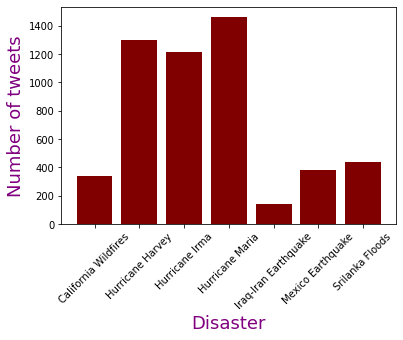

In [ ]:
#There are duplicate tweets
# print("California Wildfires:\nNumber of tweets- ",df1.shape[0])
# print("\nHurricane Harvey:\nNumber of tweets- ",df2.shape[0])
# print("\nHurricane Irma:\nNumber of tweets- ",df3.shape[0])
# print("\nHurricane Maria:\nNumber of tweets- ",df4.shape[0])
# print("\nIraq-Iran Earthquake:\nNumber of tweets- ",df5.shape[0])
# print("\nMexico Earthquake:\nNumber of tweets- ",df6.shape[0])
# print("\nSrilanka Floods:\nNumber of tweets- ",df7.shape[0])

barplots([count.iloc[0]['label'],count.iloc[1]['label'],count.iloc[2]['label']
          ,count.iloc[3]['label'],count.iloc[4]['label'],count.iloc[5]['label'],count.iloc[6]['label']])

In [ ]:
def barplot2(df):
    seaborn.set_theme(style="darkgrid")
    ax = seaborn.countplot(x="event_name",hue='label_text', data=df)
    labels = ['California Wildfires', 'Hurricane Harvey', 'Hurricane Irma', 'Hurricane Maria', 'Iraq-Iran Earthquake'
         , 'Mexico Earthquake', 'Srilanka Floods']
    ax.set_xticklabels(labels,rotation=45)
    ax.set_xlabel('Disaster Name',fontsize=20, color='blue');
    ax.set_ylabel('Text Label Counts',fontsize=20,  color='blue');




In [ ]:
#barplot2(pd.concat([df_train,df_test,df_val]))

In [ ]:
def tweetlength(text):
    list = text.split()
    return len(list)

In [ ]:
def tweetstats(l):
    return np.array([round(sum(l)/len(l)), min(l), max(l), np.array(l).std()])

In [ ]:
def rangeplots(array):
    import matplotlib.pyplot as plt
    import numpy as np

# construct some data like what you have:

    mins = array[1,:]
    maxes = array[2,:]
    means = array[0,:]
    std = array[3,:]
    
    seaborn.set_theme(style="white")

# create stacked errorbars:
    plt.errorbar(np.arange(len(mins)), means, std, fmt='ok', lw=3)
    plt.errorbar(np.arange(len(mins)), means, [means - mins, maxes - means],
             fmt='ok', ecolor='red', lw=1)
    plt.xlim(-1, len(mins))
    plt.ylabel('Tweet length (in words)', {'color':  'green', 'size': 15})
    plt.xlabel('Disaster', {'color':  'green', 'size': 15})
    labels = ['California Wildfires', 'Hurricane Harvey', 'Hurricane Irma', 'Hurricane Maria', 'Iraq-Iran Earthquake'
         , 'Mexico Earthquake', 'Srilanka Floods']
    plt.xticks(np.arange(len(mins)), labels, rotation ='45')
    plt.rcParams["figure.figsize"] = (8,6)
    plt.show()

In [ ]:
array = np.zeros([4,7])
l1 = df_train[df_train['event_name']=='california_wildfires'].tweet_text.apply(tweetlength)
array[:,0]=tweetstats(l1)
l2 = df_train[df_train['event_name']=='hurricane_harvey'].tweet_text.apply(tweetlength)
array[:,1]=tweetstats(l2)
l3 = df_train[df_train['event_name']=='hurricane_irma'].tweet_text.apply(tweetlength)
array[:,2]=tweetstats(l3)
l4 = df_train[df_train['event_name']=='hurricane_maria'].tweet_text.apply(tweetlength)
array[:,3]=tweetstats(l4)
l5 = df_train[df_train['event_name']=='iraq_iran_earthquake'].tweet_text.apply(tweetlength)
array[:,4]=tweetstats(l5)
l6 = df_train[df_train['event_name']=='mexico_earthquake'].tweet_text.apply(tweetlength)
array[:,5]=tweetstats(l6)
l7 = df_train[df_train['event_name']=='srilanka_floods'].tweet_text.apply(tweetlength)
array[:,6]=tweetstats(l7)
# rangeplots(array)
#array=np.column_stack((l1,l2,l3,l4,l5,l6,l7))

In [ ]:
df_train.columns

Index(['event_name', 'tweet_id', 'image_id', 'tweet_text', 'image', 'label',
       'label_text', 'label_image', 'label_text_image'],
      dtype='object')

In [ ]:
def MatchingLabelFilter(df):
    newdf= df.loc[df['text_human'] == df['image_human']]
    newdf.reset_index(inplace = True, drop = True)
    return newdf

In [ ]:
# df = pd.concat([df1,df2,df3,df4,df5,df6,df7])
BATCHSIZE=df_train.shape[0]

In [ ]:
# df.shape
#df_train

In [ ]:
# df = MatchingLabelFilter(df)
# df.shape

In [ ]:
# df_train= df_train.drop(['tweet_id', 'image_id','image', 'label','label_image'], axis=1)
# df_val= df_val.drop(['tweet_id', 'image_id','image', 'label','label_image'], axis=1)
# df_test= df_test.drop(['tweet_id', 'image_id','image', 'label','label_image'], axis=1)

In [ ]:
df_train = df_train.dropna()
df_val = df_val.dropna()
df_test = df_test.dropna()

In [ ]:
df_train.reset_index(inplace = True, drop = True)
df_val.reset_index(inplace = True, drop = True)
df_test.reset_index(inplace = True, drop = True)

In [ ]:
df_train.shape

(5263, 9)

In [ ]:
nltk.download('stopwords')
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')
#print(stop_words)

text_cleaning_re = "@\S+|https?:\S+|http?:\S+|[^A-Za-z0-9]+"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def preprocess(text):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  text = re.sub(r'&amp;', '&', text)
  tokens = []
  for token in text.split():
    if (token not in stop_words and (len(token)!=1) and token not in ["rt","RT"]):
        tokens.append(token)
        #The join() method takes all items in an iterable and joins them into one string.
  return " ".join(tokens)

In [ ]:
# df_train.tweet_text = df_train.tweet_text.apply(preprocess)
# df_val.tweet_text = df_val.tweet_text.apply(preprocess)
# df_test.tweet_text = df_test.tweet_text.apply(preprocess)
# lt = df_train.tweet_text.apply(preprocess)
# print(np.array(lt))

In [ ]:
vocabularyfile = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = FullTokenizer(vocabularyfile, do_lower_case)

In [ ]:
def embedding(string):
    string = tokenizer.tokenize(string)
            
    string = string[:maxstringlength-2]
    input_sequence = ["[CLS]"] + string + ["[SEP]"]
    pad_len = maxstringlength - len(input_sequence)

    tokens = tokenizer.convert_tokens_to_ids(input_sequence)
    tokens += [0] * pad_len
    pad_masks = [1] * len(input_sequence) + [0] * pad_len
    segment_ids = [0] * maxstringlength
    return tokens, pad_masks, segment_ids

In [ ]:
def formatting(data):
    tokenlist = []
    masklist = []
    segmentlist = []
    for i in range(data.shape[0]):
        tokenlist.append(data[i][0])
        masklist.append(data[i][1])
        segmentlist.append(data[i][2])
    return np.array(tokenlist), np.array(masklist), np.array(segmentlist)

In [ ]:
maxstringlength = 22
trainingdata = df_train.tweet_text.apply(embedding)
testingdata = df_test.tweet_text.apply(embedding)
valdata = df_val.tweet_text.apply(embedding)

X_train = formatting(trainingdata)
X_test = formatting(testingdata)
X_val = formatting(valdata)

# Y_train = df_train.label_text.values
# Y_val = df_val.label_text.values

In [ ]:
def modeldefinition(bert_layer, noofcategories, maxstringlength=512):
    tokens = tf.keras.Input(shape=(maxstringlength,), dtype=tf.int32, name="tokens")
    masks = tf.keras.Input(shape=(maxstringlength,), dtype=tf.int32, name="masks")
    segments = tf.keras.Input(shape=(maxstringlength,), dtype=tf.int32, name="segments")

    pooled_output, sequence_output = bert_layer([tokens, masks, segments])
    clf_output = sequence_output[:, 0, :]
    net = tf.keras.layers.Dense(64, activation='relu')(clf_output)
    net = tf.keras.layers.Dropout(0.4)(net)
    out = tf.keras.layers.Dense(noofcategories, activation='softmax')(net)
    
    model = tf.keras.models.Model(inputs=[tokens, masks, segments], outputs=out)
    model.compile(tf.keras.optimizers.Adam(lr=1e-6), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
# prepare input data
def One_Hot_Encoding(Y_train, Y_val, Y_test):
    ohe = OneHotEncoder(handle_unknown='ignore')
    ohe.fit(Y_train)
    categoryarray=ohe.categories_
    Y_train_enc = ohe.transform(Y_train)
    Y_test_enc = ohe.transform(Y_test)
    Y_val_enc = ohe.transform(Y_val)
    return categoryarray, Y_train_enc, Y_val_enc, Y_test_enc

In [ ]:
noofcategories = df_train["label_text"].nunique()

In [ ]:
categoryarray, Y_train, Y_val, Y_test = One_Hot_Encoding(np.array(df_train.label_text.to_list()).reshape(-1,1), np.array(df_val.label_text.to_list()).reshape(-1,1), np.array(df_test.label_text.to_list()).reshape(-1,1))       # Neural networks expects input values to be numerical.
Y_train = Y_train.toarray()
Y_val = Y_val.toarray()
Y_test = Y_test.toarray()
Y_train

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]])

In [ ]:
model = modeldefinition(bert_layer, noofcategories, maxstringlength=22)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
tokens (InputLayer)             [(None, 22)]         0                                            
__________________________________________________________________________________________________
masks (InputLayer)              [(None, 22)]         0                                            
__________________________________________________________________________________________________
segments (InputLayer)           [(None, 22)]         0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 1024), (None 335141889   tokens[0][0]                     
                                                                 masks[0][0]                  

In [ ]:
callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='auto', patience=5, cooldown=1),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5)]

In [ ]:
H = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val), verbose=1,
    epochs=12,
    batch_size=32,
    callbacks=callbacks
)

model.save('model.h5')

Epoch 1/12
165/165 [==============================] - 121s 546ms/step - loss: 1.7181 - accuracy: 0.2880 - val_loss: 1.1191 - val_accuracy: 0.5902
Epoch 2/12
165/165 [==============================] - 93s 566ms/step - loss: 1.1204 - accuracy: 0.5932 - val_loss: 0.9039 - val_accuracy: 0.6723
Epoch 3/12
165/165 [==============================] - 93s 563ms/step - loss: 0.9413 - accuracy: 0.6723 - val_loss: 0.7781 - val_accuracy: 0.7134
Epoch 4/12
165/165 [==============================] - 93s 567ms/step - loss: 0.7774 - accuracy: 0.7369 - val_loss: 0.6981 - val_accuracy: 0.7535
Epoch 5/12
165/165 [==============================] - 93s 565ms/step - loss: 0.6749 - accuracy: 0.7607 - val_loss: 0.6445 - val_accuracy: 0.7575
Epoch 6/12
165/165 [==============================] - 93s 566ms/step - loss: 0.5909 - accuracy: 0.7951 - val_loss: 0.6205 - val_accuracy: 0.7675
Epoch 7/12
165/165 [==============================] - 93s 566ms/step - loss: 0.5396 - accuracy: 0.8210 - val_loss: 0.5995 - val_a

In [49]:
score = model.predict(X_test, batch_size=16)    # Score is the probability output of the last layer

Y_pred=[]
for i in score:
    Y_pred.append(categoryarray[0][np.argmax(i)])
    
Y_true = df_test.label.tolist()

In [50]:
cmatrix = confusion_matrix(Y_true, Y_pred, labels=categoryarray[0])
np.set_printoptions(precision=2)

In [51]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion Matrix',
                          cmap='Oranges',
                          normalize=False):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,
          fontsize=20,
          color="green")
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=90, fontsize=12)
        plt.yticks(tick_marks, target_names, fontsize=12)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 2.0 if normalize else cm.max() / 4
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label',fontsize=18, color='maroon')
    plt.xlabel('Predicted label\n\nAccuracy={:0.4f}; Misclass={:0.4f}'.format(accuracy, misclass),fontsize=18, color='maroon')
    plt.rcParams["figure.figsize"] = (8,8)
    plt.rcParams.update({'font.size': 16})
    plt.show()

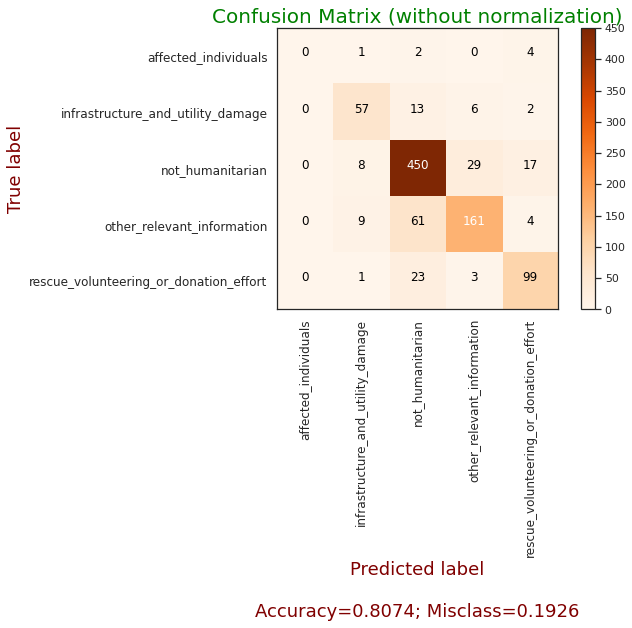

In [52]:
seaborn.set_theme(style="white")
plot_confusion_matrix(cmatrix, categoryarray[0], title='Confusion Matrix (without normalization)')

In [53]:
print(classification_report(Y_true, Y_pred, digits=4))

                                        precision    recall  f1-score   support

                  affected_individuals     0.0000    0.0000    0.0000         7
     infrastructure_and_utility_damage     0.7308    0.7308    0.7308        78
                injured_or_dead_people     0.0000    0.0000    0.0000         2
                      not_humanitarian     0.8182    0.8929    0.8539       504
            other_relevant_information     0.8090    0.6851    0.7419       235
rescue_volunteering_or_donation_effort     0.7734    0.7857    0.7795       126
                        vehicle_damage     0.0000    0.0000    0.0000         3

                              accuracy                         0.8031       955
                             macro avg     0.4473    0.4421    0.4437       955
                          weighted avg     0.7926    0.8031    0.7957       955



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# from wordcloud import WordCloud, STOPWORDS
# stopwords = set(STOPWORDS)

# def show_wordcloud(data):
#     wordcloud = WordCloud(
#         background_color='white',
#         stopwords=stopwords,
#         max_words=100,
#         max_font_size=30,
#         scale=3,
#         random_state=1)
   
#     wordcloud=wordcloud.generate(str(data))

#     fig = plt.figure(1, figsize=(12, 12))
#     plt.axis('off')

#     plt.imshow(wordcloud)
#     plt.show()
# string = " ".join(df.tweet_text.tolist())
# show_wordcloud(string)

In [ ]:
#https://en.wikipedia.org/wiki/Word2vec#CBOW_and_skip_grams
#https://towardsdatascience.com/nlp-101-word2vec-skip-gram-and-cbow-93512ee24314
#https://arxiv.org/pdf/1411.2738.pdf

In [ ]:
#DATARATIO=0.85

In [ ]:
#df_train, df_test = train_test_split(df, test_size=1-DATARATIO, random_state=13)   #Scikit

In [ ]:
#df_train.tweet_text[0]